# Membaca data preferensi musik

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [273]:
df=pd.read_csv('Musik survey.csv')

In [274]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


# Missing Value

In [275]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

# menghapus data missing value

In [276]:
df = df.dropna()

In [277]:
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [278]:
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

Data Cleaning

In [279]:
df = (
    df
    .rename(columns={
    'Frequency [Classical]': 'Classical',          
    'Frequency [Country]': 'Country',               
    'Frequency [EDM]': 'EDM',                  
    'Frequency [Folk]': 'Folk',                  
    'Frequency [Gospel]': 'Gospel',                
    'Frequency [Hip hop]': 'Hip hop',               
    'Frequency [Jazz]': 'Jazz',                  
    'Frequency [K pop]': 'K pop',                 
    'Frequency [Latin]': 'Latin',                 
    'Frequency [Lofi]': 'Lofi',                  
    'Frequency [Metal]': 'Metal',                 
    'Frequency [Pop]': 'Pop',                   
    'Frequency [R&B]': 'R&B',                  
    'Frequency [Rap]': 'Rap',               
    'Frequency [Rock]': 'Rock',                 
    'Frequency [Video game music]': 'Games music'      
}))
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,R&B,Rap,Rock,Games music,Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [280]:
df = df.drop(columns = ['Timestamp','Primary streaming service','Classical','Country','EDM','Folk','Gospel','Hip hop','Jazz','K pop','Latin','Lofi','Metal','Pop','R&B','Rap','Rock','Games music','Music effects','Permissions'])

In [281]:
df = df.astype({    
    'Age': 'int8',
    'Hours per day': 'float16',
    'While working': bool,
    'Instrumentalist': bool,
    'Composer': bool,
    'Exploratory': bool,
    'Foreign languages': bool,
    'BPM': 'int16',
    'Anxiety': 'int8',
    'Depression': 'int8',
    'Insomnia': 'int8',
    'OCD': 'int8',
})

In [282]:
df = df.astype({    
    'While working': int,
    'Instrumentalist': int,
    'Composer': int,
    'Exploratory': int,
    'Foreign languages': int,
})

# Data Information

In [283]:
df.shape

(616, 13)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 2 to 735
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                616 non-null    int8   
 1   Hours per day      616 non-null    float16
 2   While working      616 non-null    int32  
 3   Instrumentalist    616 non-null    int32  
 4   Composer           616 non-null    int32  
 5   Fav genre          616 non-null    object 
 6   Exploratory        616 non-null    int32  
 7   Foreign languages  616 non-null    int32  
 8   BPM                616 non-null    int16  
 9   Anxiety            616 non-null    int8   
 10  Depression         616 non-null    int8   
 11  Insomnia           616 non-null    int8   
 12  OCD                616 non-null    int8   
dtypes: float16(1), int16(1), int32(5), int8(5), object(1)
memory usage: 27.1+ KB


In [285]:
df.describe()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Anxiety,Depression,Insomnia,OCD
count,616.000000,616.000000,616.0,616.0,616.0,616.0,616.0,616.000000,616.000000,616.000000,616.000000,616.000000
mean,24.792208,3.701172,1.0,1.0,1.0,1.0,1.0,100.936688,5.883117,4.892857,3.800325,2.657468
std,11.658515,3.072266,0.0,0.0,0.0,0.0,0.0,563.395595,2.757867,2.998896,3.112116,2.854956
min,10.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-13825.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.0,1.0,1.0,1.0,1.0,100.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.0,1.0,1.0,1.0,1.0,120.000000,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,1.0,1.0,1.0,1.0,1.0,144.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.0,1.0,1.0,1.0,1.0,624.000000,10.000000,10.000000,10.000000,10.000000


In [286]:
df.describe(exclude='number')

,Fav genre
count,616
unique,16
top,Rock
freq,149


# Data Visualization

The distribution of customer age

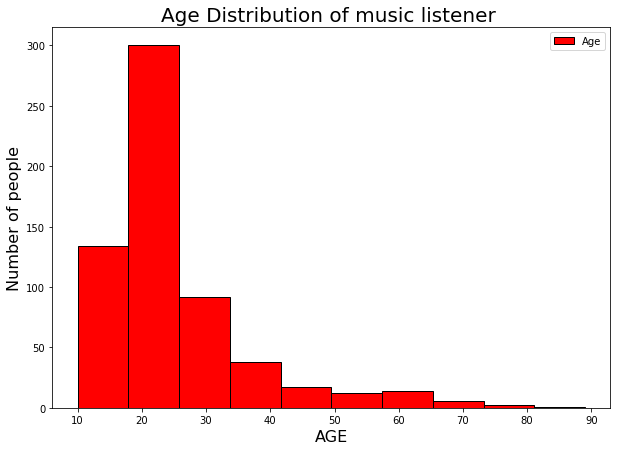

In [287]:
plt.figure(figsize=(10,7))

plt.hist(df['Age'], bins = 10, color='red', edgecolor='black', label = 'Age')
plt.xlabel('AGE', fontsize = 16)
plt.ylabel('Number of people', fontsize = 16)
plt.title('Age Distribution of music listener ', fontsize = 20)
plt.legend(loc='upper right')

In [288]:
print(f'Minimum age: {df["Age"].min()}')
print(f'Minimum age: {df["Age"].max()}')

Minimum age: 10
Minimum age: 89


The distribution of customer music provider

In [289]:
df['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'EDM',
       'Country', 'Hip hop', 'Rap', 'Pop', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [290]:
df['Age group'] = pd.cut(df['Age'], bins=[9, 19, 59, 89],
                                 labels=['Teenager', 'Adults', 'Seniors'])


In [291]:
df['Age group'].value_counts()

Adults      337
Teenager    261
Seniors      18
Name: Age group, dtype: int64

In [292]:
Fav_Genre = (
    df
    .groupby('Age group')['Fav genre']
    .agg(['value_counts'])
    .reset_index()
    .rename(columns={'value_counts':'quantity'})
)

Fav_Genre

,Age group,Fav genre,quantity
0,Teenager,Pop,48
1,Teenager,Rock,48
2,Teenager,Metal,24
3,Teenager,Classical,18
4,Teenager,K pop,18
5,Teenager,R&B,18
6,Teenager,Video game music,17
7,Teenager,EDM,16
8,Teenager,Hip hop,14
9,Teenager,Rap,14


In [293]:
teenagers = pd.DataFrame(Fav_Genre.query('`Age group` == "Teenager"'))
adults = pd.DataFrame(Fav_Genre.query('`Age group` == "Adults"'))
seniors = pd.DataFrame(Fav_Genre.query('`Age group` == "Seniors"'))

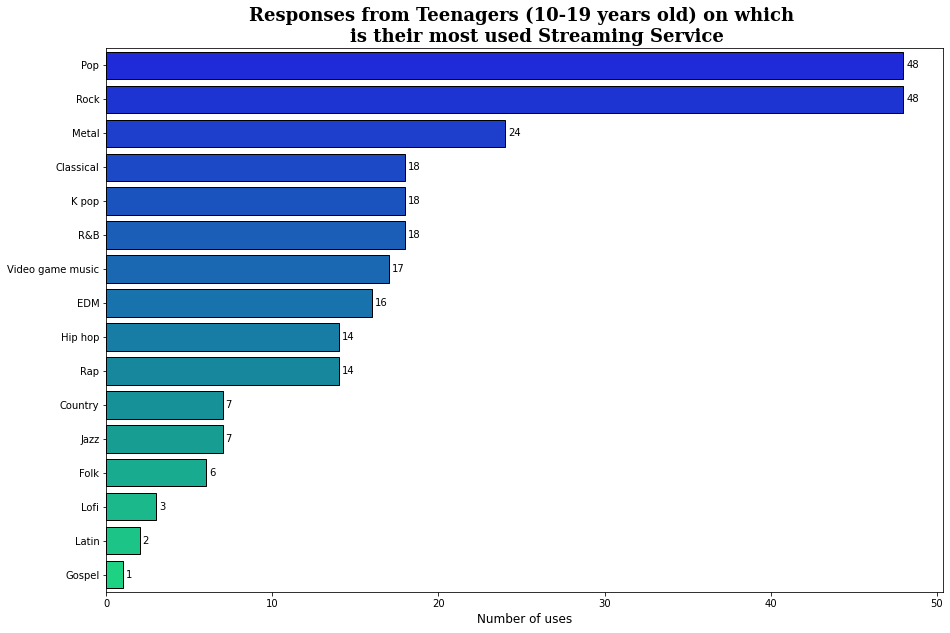

In [294]:
fig, ax = plt.subplots(figsize=(15,10))

ax1 = sns.barplot(
    x='quantity', 
    y='Fav genre',
    data=teenagers, 
    edgecolor='black', 
    palette='winter'
)

for (labels) in ax1.containers:
    ax1.bar_label(labels, padding=3)

plt.title(
    '''Responses from Teenagers (10-19 years old) on which 
    is their most used Streaming Service''', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
)
plt.xlabel('Number of uses', fontsize=12)
plt.ylabel('')
plt.show()

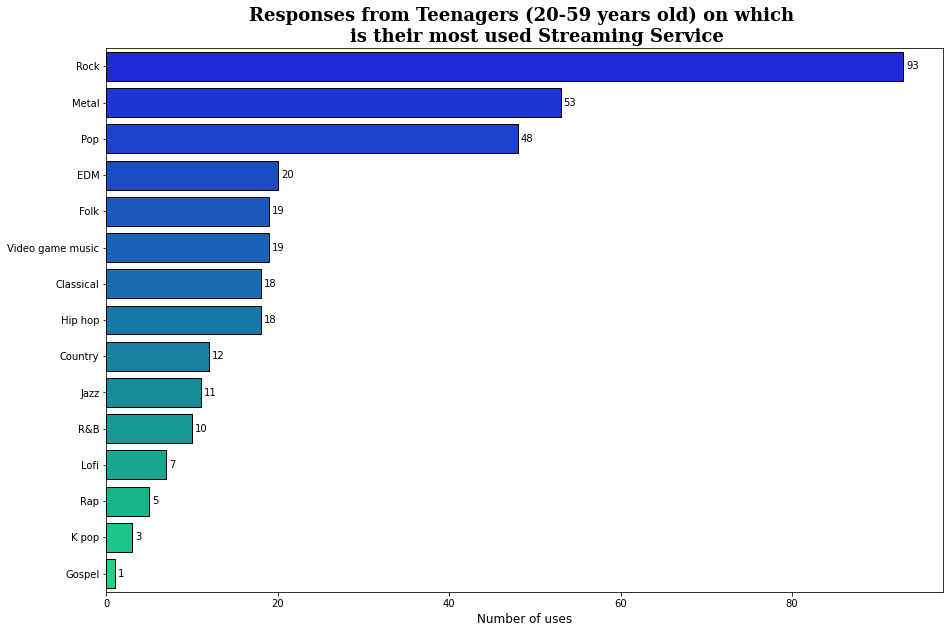

In [303]:
fig, ax = plt.subplots(figsize=(15,10))

ax1 = sns.barplot(
    x='quantity', 
    y='Fav genre',
    data = adults, 
    edgecolor='black', 
    palette='winter'
)

for (labels) in ax1.containers:
    ax1.bar_label(labels, padding=3)

plt.title(
    '''Responses from Teenagers (20-59 years old) on which 
    is their most used Streaming Service''', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
)
plt.xlabel('Number of uses', fontsize=12)
plt.ylabel('')
plt.show()

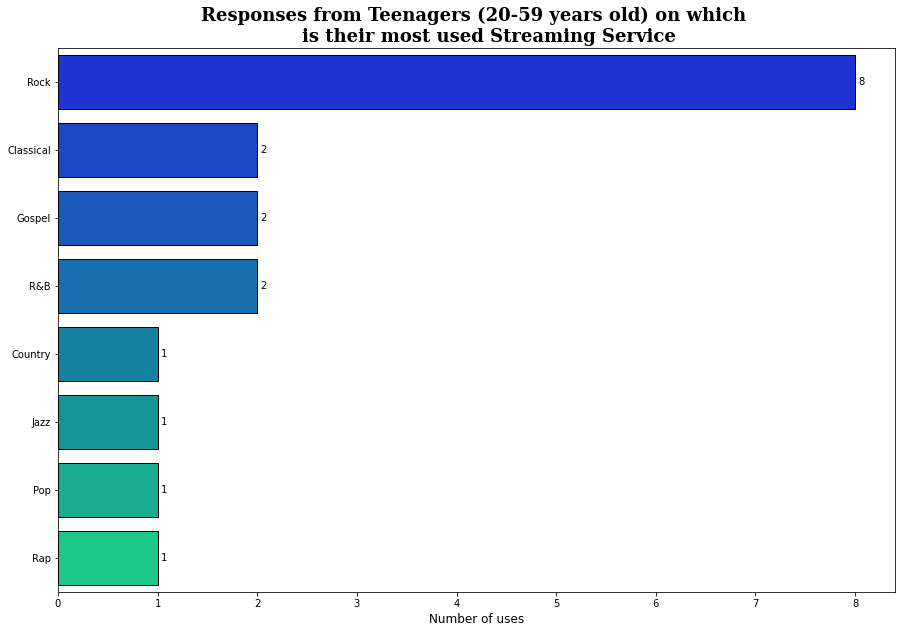

In [305]:
fig, ax = plt.subplots(figsize=(15,10))

ax1 = sns.barplot(
    x='quantity', 
    y='Fav genre',
    data = seniors, 
    edgecolor='black', 
    palette='winter'
)

for (labels) in ax1.containers:
    ax1.bar_label(labels, padding=3)

plt.title(
    '''Responses from Teenagers (20-59 years old) on which 
    is their most used Streaming Service''', 
    fontdict={'size': 18, 'weight': 'bold', 'family': 'serif'}
)
plt.xlabel('Number of uses', fontsize=12)
plt.ylabel('')
plt.show()

# prediction data

Data Cleaning 

In [298]:
x = df.drop(columns = ['Fav genre','Age group'])
y = df['Fav genre']
model = DecisionTreeClassifier()
model.fit(x,y)
predictions = model.predict( [[19, 4, 1, 1, 0, 1, 0 , 135, 5, 8, 10, 10]])
predictions

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Video game music'], dtype=object)

Accuracy of the model

In [300]:
x = df.drop(columns = ['Fav genre','Age group'])
y = df['Fav genre']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
score = accuracy_score(y_test, predictions)
score


0.0967741935483871

berdasarkan uji akurasi diatas maka model ini memiliki akurasi yang sangat rendah sehingga perlu dilakukan perbaikan model